In [245]:
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [246]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)

In [247]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [248]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


supprime les colonnes name, ticket, cabin, boat, home.dest et body

In [249]:
X.drop('name', axis=1, inplace=True)
X.drop('ticket', axis=1, inplace=True)
X.drop('cabin', axis=1, inplace=True)
X.drop('boat', axis=1, inplace=True)
X.drop('home.dest', axis=1, inplace=True)
X.drop('body', axis=1, inplace=True)

In [250]:
# X.sex.unique()

In [251]:
# X.info()

In [252]:
# plt.hist(X["age"], bins=80, edgecolor='white', linewidth=0.5)
# plt.xlabel("Age")
# plt.ylabel("Nombre de personnes")
# plt.show()

remplace valeurs manquantes colonnes age et emarked en gardant la répartition et valeurs manquantes colonne fare par la moyenne

In [253]:
# X['age'].fillna(X['age'].mean(), inplace=True)
age_counts = X['age'].value_counts(normalize=True)
X['age'].fillna(pd.Series(np.random.choice(age_counts.index, size=len(X.index), p=age_counts.values)), inplace=True)
embarked_counts = X['embarked'].value_counts(normalize=True)
X['embarked'].fillna(pd.Series(np.random.choice(embarked_counts.index, size=len(X.index), p=embarked_counts.values)), inplace=True)
X['fare'].fillna(X['fare'].mean(), inplace=True)

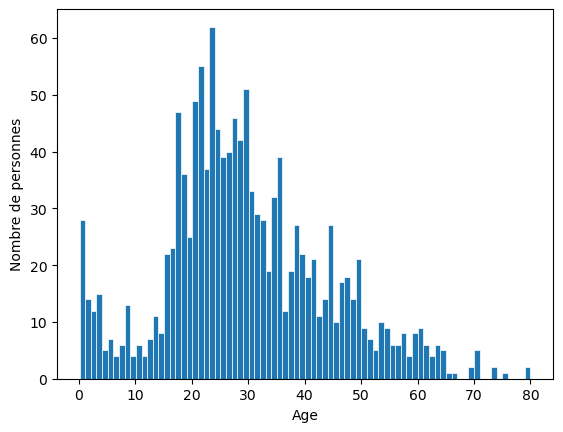

In [254]:
plt.hist(X["age"], bins=80, edgecolor='white', linewidth=0.5)
plt.xlabel("Age")
plt.ylabel("Nombre de personnes")
plt.show()

In [255]:
# X.isnull().sum()

affiche répartition classes/ages

In [256]:
# sns.scatterplot(data=X, x="age", y="pclass")
# plt.xlabel("Age")
# plt.ylabel("Classes")
# plt.show()

affiche graph ages

In [257]:
# plt.hist(X["age"], bins=80, edgecolor='white', linewidth=0.5)
# plt.xlabel("Age")
# plt.ylabel("Nombre de personnes")
# plt.show()

sépare les colonnes sex, sibsp, parch, pclass, embarked en plusieurs colonnes

In [258]:
X = pd.get_dummies(X, columns=['sibsp'])
X = pd.get_dummies(X, columns=['parch'])
X = pd.get_dummies(X, columns=['pclass'])
X = pd.get_dummies(X, columns=['embarked'])
X = pd.get_dummies(X, columns=['sex'])

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [260]:
X_train.shape

(981, 25)

In [261]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [262]:
import time

# get the start time

# Entraîner un modèle de régression logistique
malist = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for mod in malist:
    st = time.time()
    model = LogisticRegression(solver=mod, max_iter=1000)
    et = time.time()
    model.fit(X_train, y_train)
    print(et-st,mod,model.score(X_train, y_train)) 

0.0 lbfgs 0.7869520897043832
0.0 liblinear 0.7869520897043832
0.0 newton-cg 0.7869520897043832
0.0 sag 0.7869520897043832
0.0 saga 0.7869520897043832


In [263]:
scores = cross_validate(model, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracy sur les données de validation :", scores["test_score"].mean())

Accuracy sur les données de validation : 0.7838754791256605


In [264]:
# Recherche d'hyperparamètres
parameters = {"C": np.arange(0.1, 10, 0.1)}
grid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Évaluer le meilleur modèle sur les données de test
print("Accuracy sur les données de test :", best_model.score(X_test, y_test))

Accuracy sur les données de test : 0.7926829268292683


In [269]:
# Importance des features
feature_importances = best_model.coef_.ravel()
print("Importance des features :", feature_importances)

Importance des features : [-1.77144598 -0.05405381  1.00775475  0.79401545  0.8599767  -0.28286497
 -0.68369466 -0.80142437 -0.90309875  0.42457844  1.19803032  0.61141875
  0.42230375 -1.2847634  -0.1539532  -0.56074734 -0.66620316  0.88047699
  0.00794004 -0.89775287  0.31486939 -0.03051294 -0.2936923   1.25475909
 -1.26409494]


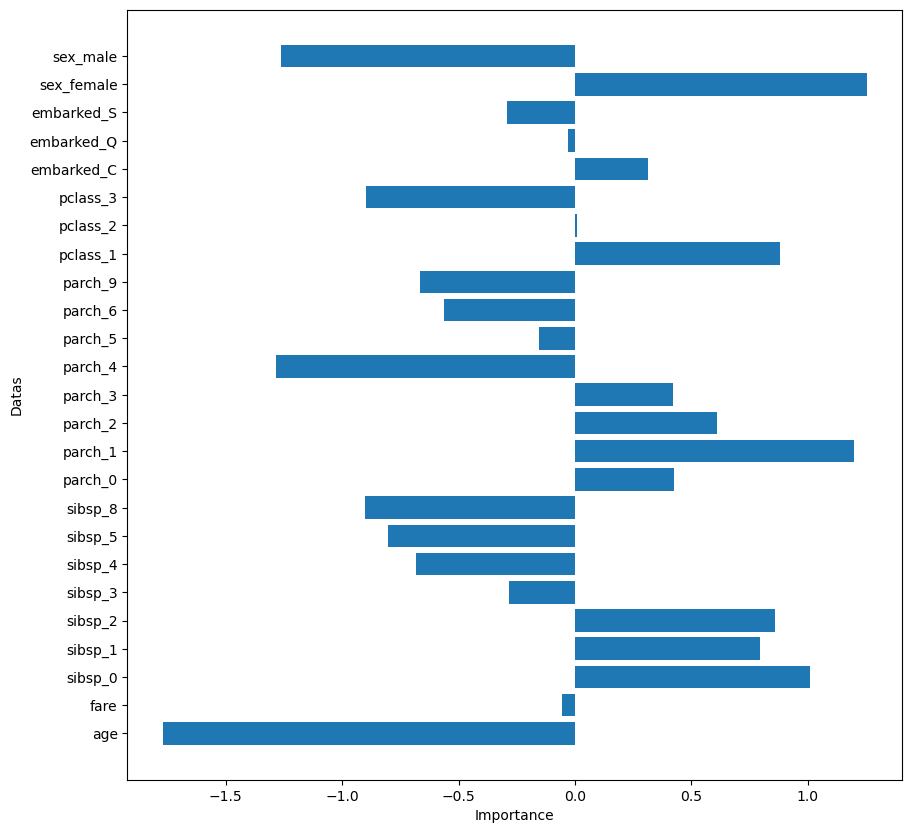

In [266]:
# Importance des features
feature_importances = best_model.coef_.ravel()

# Plot des features importances en transposé
plt.figure(figsize=(10, 10))
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Datas")
plt.show()

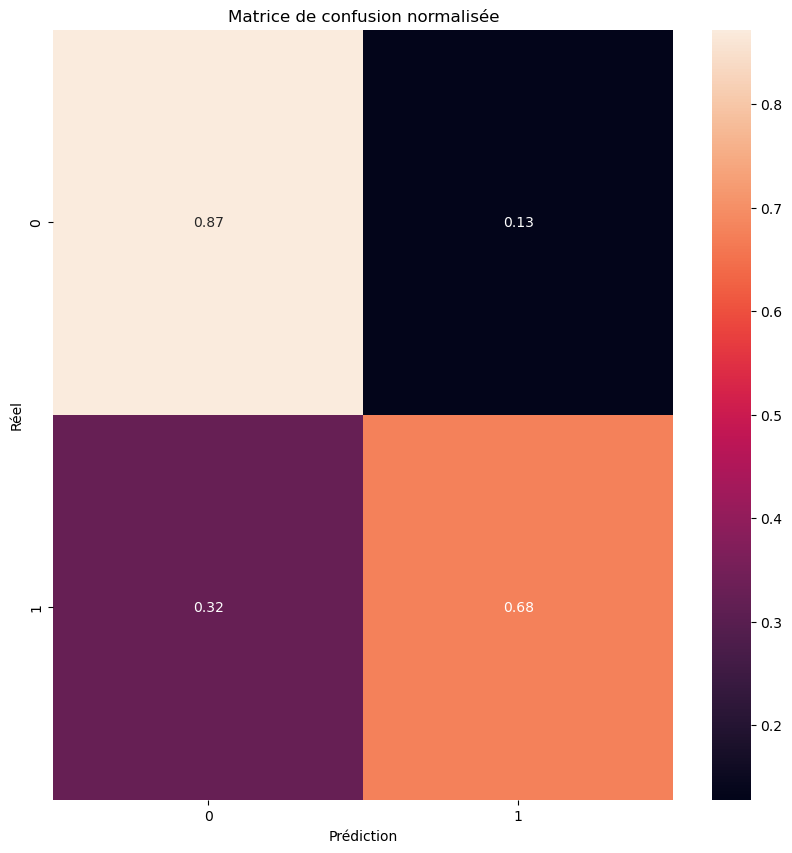

In [267]:
# Prédictions sur les données de test
y_pred = best_model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normaliser la matrice de confusion
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Afficher la matrice de confusion sous forme de heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", ax=ax)
plt.title("Matrice de confusion normalisée")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

In [268]:
# Calculer le rapport de classification
report = classification_report(y_test, y_pred, target_names=["Survivant", "Non-survivant"])

# Afficher le rapport de classification
print(report)

               precision    recall  f1-score   support

    Survivant       0.80      0.87      0.83       195
Non-survivant       0.78      0.68      0.73       133

     accuracy                           0.79       328
    macro avg       0.79      0.77      0.78       328
 weighted avg       0.79      0.79      0.79       328

